Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje
<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Laboratorijska vježba 4: Neparametarski modeli i vrednovanje modela

(c) 2015 Jan Šnajder, Domagoj Alagić

*Verzija 0.3*

Objavljeno: **7. siječnja 2016.**<br>
Rok za predaju: **11-15. siječnja 2016.**

## Upute

Laboratorijska vježba 4 sastoji se od 8 zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg koda te evaluiranja ćelija. Odgovore na pitanja **nemojte pisati** u bilježnicu koju ćete demonstrirati asistentu (kako ih pri predaji ne biste samo čitali).

Osigurajte da u potpunosti **razumijete** kod koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta preinačiti i ponovno evaluirati Vaš kod. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Stoga se nemojte ograničiti samo na to da riješite zadatak, već slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as sp
import sklearn
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Pomoćna funkcija za iscrtavanje ulaznog prostora primjera i granice između klasa:

In [2]:
def plot_problem(X, y, h=None, surfaces=True) :
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision boundaries (surfaces=False) or decision surfaces (surfaces=True)
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h != None : 
        # Create a mesh to plot in
        r = 0.02  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX = np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if shape(Z_test) == () :
                # h returns a scalar when applied to a matrix; map explicitly
                Z = sp.array(map(h,XX))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = sp.array(map(h,XX))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        if surfaces :
            plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        else :
            plt.contour(xx, yy, Z)
    # Plot the dataset
    scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.Paired,marker='o',s=50);

## Zadatci

### 1. Implementacija algoritma k-nn

### (a)

Implementirajte klasu `KNN` koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za treniranje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`scipy.linalg.norm`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html)). Nije potrebno implementirati težinsku funkciju.

In [3]:
from scipy.linalg import norm
import operator 

class KNN: 
    
    def __init__(self, classes, k=3):
        self.dataset = []
        self.labels = []
        self.k = k
        self.classes = classes
            
    def fit(self, X, y): 
        # training is saving dataset
        self.dataset = X
        self.labels = y
    
    def predict(self, X):
        indices = []
        predicted = []
        
        for query_index in range(len(X)):   
            indices = self.getNeighbors(X[query_index])
            votes = []
            for c in self.classes:
                count = 0
                for i in indices:
                    if (c == self.labels[i]):
                        count += 1
                votes.append(count)               
            predicted.append(votes.index(max(votes)))           
        return predicted
    
    def getNeighbors(self, example):
        distances = []
        indices = []    
        # calculate euclidean distance between example and every example in dataset
        for x in self.dataset:
            # skip if same example
            if not numpy.array_equal(x, example):          
                distances.append((x, norm(example-x)))
        
        # sort distances by value of euclidean distance
        distances.sort(key=operator.itemgetter(1))
        
        # getting index of neighbor in dataset
        for i in range(self.k):
            index = np.where(np.all(self.dataset==distances[i][0], axis=1))[0][0]
            indices.append(index)
                       
        # returning indexes of neighbors
        return indices



### (b)

Isprobajte algoritam implementiran u (a) dijelu zadatka na umjetno generiranome skupu s $n=2$ značajke, $K=2$ klase i $N=100$ primjera. Provjerite ispravnost algoritma tako da predikcije usporedite s onima algoritma [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

[1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1]
[1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1
 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1]
0.96


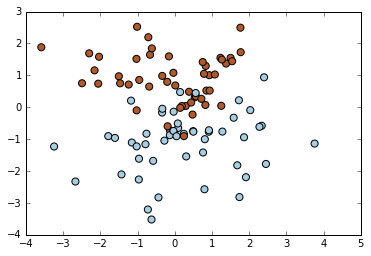

In [4]:
#from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
plot_problem(X, y)

# Implementacija KNN klase
classes = [0, 1]
k = 3
knn_classifier = KNN(classes, k)
knn_classifier.fit(X,y)
predicted = knn_classifier.predict(X)
print predicted

# sklearn implementacija
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 
sklearn_predicted = neigh.predict(X)
print sklearn_predicted

score = accuracy_score(sklearn_predicted, predicted)
print score

### (c) 

Pomoću funkcije `plot_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Eksperimentirajte s različitim vrijednostima za broj primjera $N$, broj susjeda $k$ i broj klasa $K$.

**NB:** Implementacija algoritma `KNeighborsClassifier` iz sklearna vjerojatno će raditi brže od vaše implementacije, pa koristite nju za iscrtavanje grafa. Naime, za iscrtavanje grafa potrebno je napraviti predikciju za svaku točku u regiji iscrtavanja.

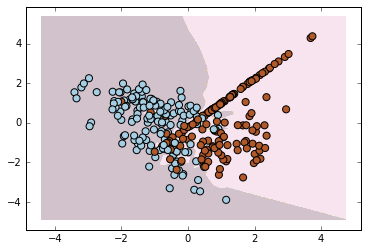

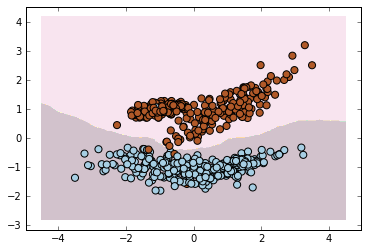

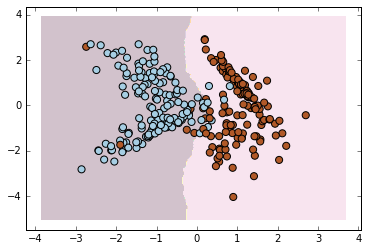

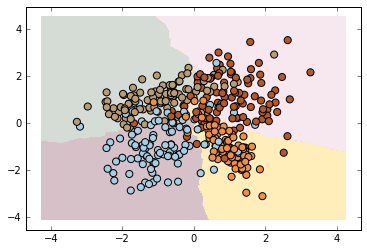

In [5]:
# X1, y1, N=300, k=1, K=2
# Overfitting, k too small, high variance
X1, y1 = make_classification(n_samples=300, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X1, y1) 
plot_problem(X1, y1, h=neigh1.predict)
plt.show()

# X2, y2, N = 300,  k=15 , K=2
# Optimal parameters
X2, y2 = make_classification(n_samples=600, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
neigh2 = KNeighborsClassifier(n_neighbors=15)
neigh2.fit(X2, y2) 
plot_problem(X2, y2, h=neigh2.predict)
plt.show()

# X3, y3, N = 300, k=50, K=2
# Underfitting, k too big, prezaglađeno, high bias
X3, y3 = make_classification(n_samples=300, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
neigh3 = KNeighborsClassifier(n_neighbors=50)
neigh3.fit(X3, y3) 
plot_problem(X3, y3, h=neigh3.predict)
plt.show()

# X4, y4, N=600, k=5, K=4
# 4 classes
X4, y4 = make_classification(n_samples=400, n_features=2, n_classes=4, n_redundant=0, n_clusters_per_class=1)
neigh4 = KNeighborsClassifier(n_neighbors=15)
neigh4.fit(X4, y4) 
plot_problem(X4, y4, h=neigh4.predict)
plt.show()

# Povećavanjem k granica postaje zaglađenija, dok kod manjeg k granica jako varira, mogu nastati "otoci"
# Pogreška može doseći nulu za k -> 
# Optimalan k hiperparametar bi odredili cross validacijom te crtanjem grafa greske u ovisnosti o k 


**Q:** Kako hiperparametar $k$ utječe na izgled granice između klasa?
    
**Q:** U kojem slučaju (za koju vrijednost $k$) pogreška učenja može doseći nulu? Zašto?
    
**Q:** Kako biste odredili optimalnu vrijednost za $k$?

### 2. Empirijska analiza algoritma k-nn

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj parametar izravno utječe na složenost algoritma, pa je važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$. Svrha ovog zadatka jest provesti sustavnu empirijsku analizu ovih ovisnosti.

### (a)

Sintetički skup primjera od $N=200$ primjera s $n=2$ značajke i $K=2$ klase podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3 (koristite funkciju [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). Iscrtajte krivulje pogreške učenja i pogreške ispitivanja za $k\in\{1,\dots,20\}$.

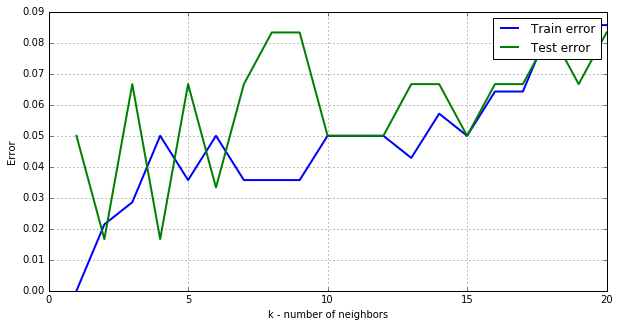

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5   # 10 inches in width, 5 in height

data_X, data_y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=42)

k_list = np.arange(1,21)
error_train = []
error_test = []

for k in k_list:

    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    predict_train = knn_model.predict(X_train)
    predict_test = knn_model.predict(X_test)

    empirijska_pogreska = 1-accuracy_score(y_train, predict_train)
    pogreska_generalizacije = 1-accuracy_score(y_test, predict_test)
    
    error_train.append(empirijska_pogreska)
    error_test.append(pogreska_generalizacije)
    

plt.plot(k_list, error_train, label="Train error" , linewidth=2)
plt.plot(k_list, error_test, label="Test error", linewidth=2)   
plt.xlabel('k - number of neighbors')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.show() 


**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto?

**Q:** Jesu li ovi rezultati stabilni? Zašto?

### (b) 

Kako bismo dobili pouzdanije rezultate, potrebno je mjerenja ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogreška. Definirajte funkciju

> `knn_eval(n_instances, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)`

koja trenira i ispituje model k-nn na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući svaki puta nov skup podataka pomoću funkcije `make_classification`. Vrijednosti parametara `n_instances`, `n_features`, `n_classes` i `n_informative` proslijedite funkciji `make_classification` te dodatno postavite `n_redundant=0` i `n_clusters_per_class=1`. Svaki generirani skup primjera treba pomoću funkcije `train_test_split` podijeliti na skup za učenje i skup za ispitivanje, pri čemu je udio skupa za ispitivanje definiran  parametrom `test_size`. Tu podjelu nije potrebno dodatno ponavljati; dovoljno je što se u svakoj iteraciji generira posve nov skup primjera. Povratne vrijednosti funkcije jest trojka `(best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from __future__ import division

def knn_eval(instances, features=2, classes=2, informative=2, test_ratio=0.3, k_range=range(1, 21), n_trials=100):
    average_train_errors = []
    average_test_errors = []
    n_redundant = 0
    
    for k in k_range:
        error_train = []
        error_test = []
        
        for i in range(n_trials):
            # generate data with make_classification method and split them with train_test_split into train/test data
            X_data, Y_data = make_classification(instances, n_features=features, n_informative=informative, n_redundant=0, n_classes=classes, n_clusters_per_class=1)
            X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=test_ratio, random_state=42)
    
            # training knn model with generated data
            knn_model = KNeighborsClassifier(n_neighbors=k)
            knn_model.fit(X_train, y_train)
            
            predict_train = knn_model.predict(X_train)
            predict_test = knn_model.predict(X_test)

            empirijska_pogreska = 1-accuracy_score(y_train, predict_train)
            pogreska_generalizacije = 1-accuracy_score(y_test, predict_test)
            
            # error calculation for train and test prediction
            error_train.append(empirijska_pogreska)
            error_test.append(pogreska_generalizacije)
        
        average_train_errors.append(sum(error_train) / n_trials)
        average_test_errors.append(sum(error_test) / n_trials)    
    
    
    # optimal k hiperparameter -> lowest error on test error
    best_k = np.argmin(average_test_errors) + 1
    return best_k, average_train_errors, average_test_errors
            

### (c)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogrešku učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=200$ primjera. Ispišite i optimalnu vrijednost za $k$.

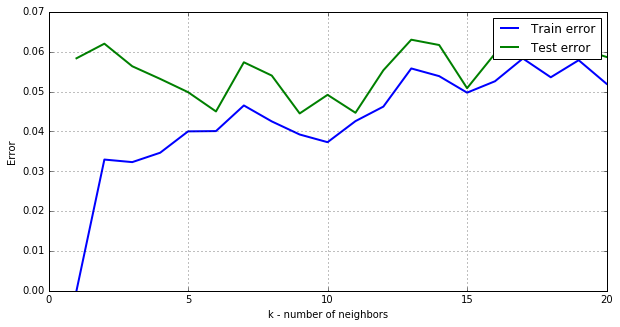

In [8]:
instances = 200
k_range=range(1, 21)
optimal_k, trainError, testError = knn_eval(instances, features=2, classes=2, informative=2, test_ratio=0.3, k_range=range(1, 21), n_trials=100)

# print "Optimalni hiperparametar k: ", optimal_k
plt.plot(k_range, trainError, label="Train error" , linewidth=2)
plt.plot(k_range, testError, label="Test error", linewidth=2)   
plt.xlabel('k - number of neighbors')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.show() 


**Q:** Jesu li rezultati očekivani? Obrazložite.

### (d)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=\{50, 100, 200, 500, 1000, 5000\}$ primjera. Načinite 6 zasebnih grafikona (generirajte ih u for-petlji). U svakoj iteraciji ispišite optimalnu vrijednost za $k$.

Optimalni k: 5 za broj primjera: 50
Optimalni k: 10 za broj primjera: 100
Optimalni k: 12 za broj primjera: 200
Optimalni k: 18 za broj primjera: 500
Optimalni k: 5 za broj primjera: 1000
Optimalni k: 13 za broj primjera: 5000


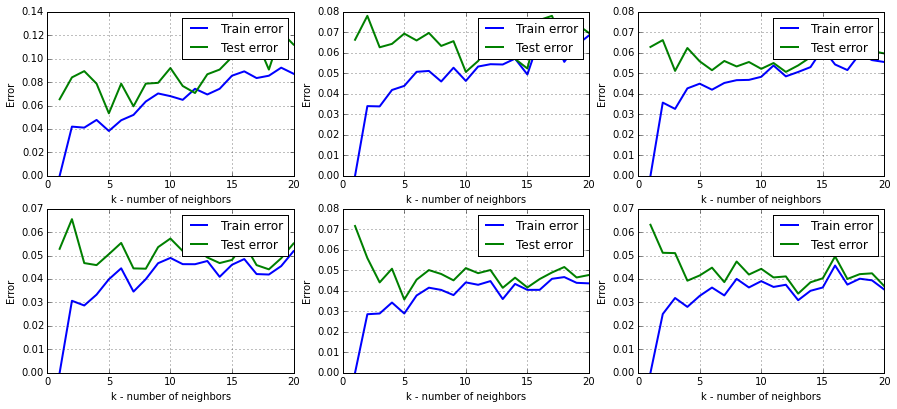

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

N_list = [50, 100, 200, 500, 1000, 5000]
optimal_k_list = []
graph_count = 1
k_range = range(1,21)
for n in N_list:
    optimal_k, trainError, testError = knn_eval(n , features=2, classes=2, informative=2, test_ratio=0.3, k_range=range(1, 21), n_trials=100)
    subplot(3,3,graph_count)
    plt.plot(k_range, trainError, label="Train error" , linewidth=2)
    plt.plot(k_range, testError, label="Test error", linewidth=2)   
    plt.xlabel('k - number of neighbors')
    plt.ylabel('Error')
    plt.legend(loc ='upper right')
    plt.grid(True)
    graph_count += 1
    print "Optimalni k: {} za broj primjera: {}".format(optimal_k, n) 
    


**Q:** Jesu li rezultati očekivani? Obrazložite.

### (e)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za broj dimenzija $n=\{2,3,\dots,10\}$, i to za $N=200$ primjera. Načinite 8 zasebnih grafikona (generirajte ih u for-petlji). U svakoj iteraciji ispišite optimalnu vrijednost za $k$.

Optimalni k: 3 za broj primjera: 200  i broj znacajki : 2
Optimalni k: 3 za broj primjera: 200  i broj znacajki : 3
Optimalni k: 3 za broj primjera: 200  i broj znacajki : 4
Optimalni k: 8 za broj primjera: 200  i broj znacajki : 5
Optimalni k: 3 za broj primjera: 200  i broj znacajki : 6
Optimalni k: 5 za broj primjera: 200  i broj znacajki : 7
Optimalni k: 9 za broj primjera: 200  i broj znacajki : 8
Optimalni k: 3 za broj primjera: 200  i broj znacajki : 9
Optimalni k: 5 za broj primjera: 200  i broj znacajki : 10


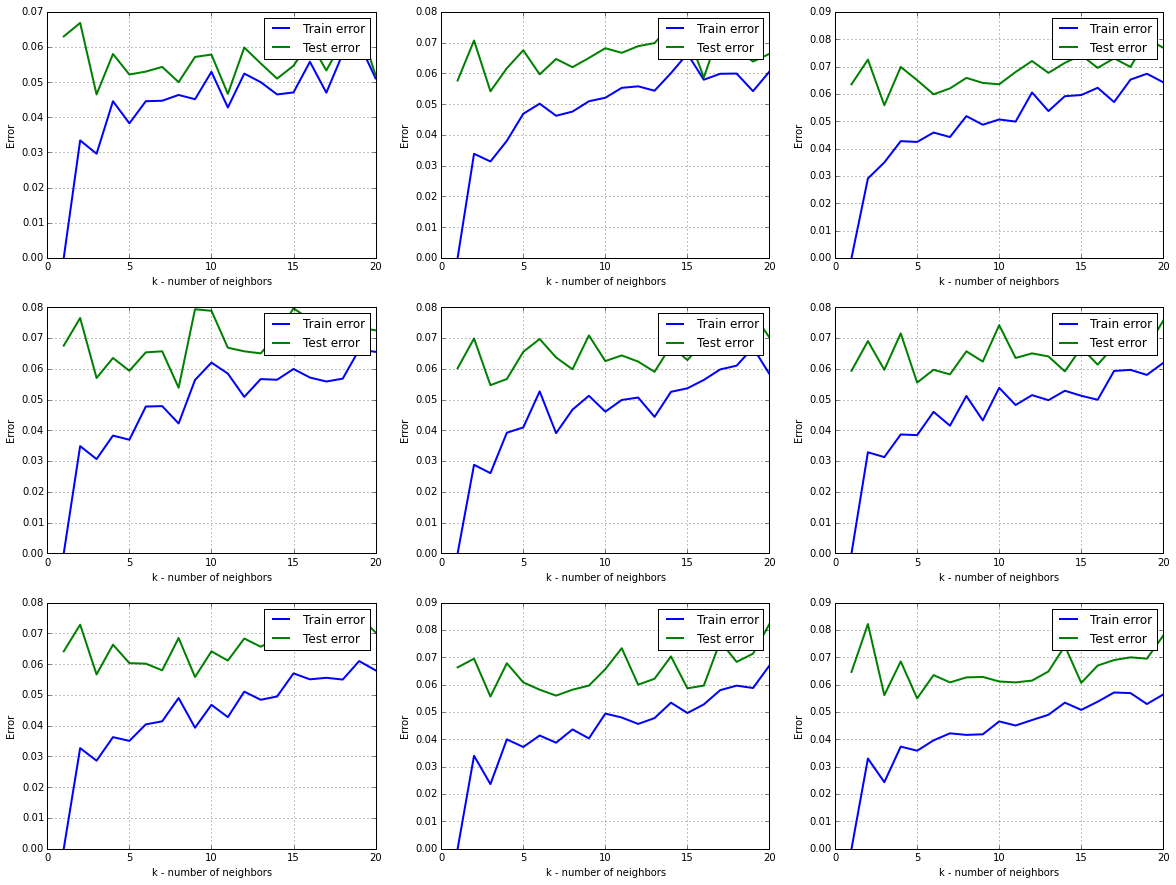

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15   # 10 inches in width, 5 in height

N_instance = 200
graph_count = 1
k_range = range(1,21)
n_features = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for _features in n_features:
    opt_k, trainError, testError = knn_eval(N_instance, features=_features, classes=2, informative=_features, test_ratio=0.3, k_range=range(1, 21), n_trials=100)
    subplot(3,3,graph_count)
    plt.plot(k_range, trainError, label="Train error" , linewidth=2)
    plt.plot(k_range, testError, label="Test error", linewidth=2)   
    plt.xlabel('k - number of neighbors')
    plt.ylabel('Error')
    plt.legend(loc ='upper right')
    plt.grid(True)
    graph_count += 1
    print "Optimalni k: {} za broj primjera: {}  i broj znacajki : {}".format(opt_k, N_instance, _features)

**Q:** Jesu li rezultati očekivani? Obrazložite.

### (f)

Pomoću funkcije `knn_eval` iz (b) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za broj klasa $K=\{2,3,4,5\}$, i to za $N=200$ primjera. Načinite 4 zasebnih grafikona (generirajte ih u for-petlji). U svakoj iteraciji ispišite optimalnu vrijednost za $k$.

Optimalni k: 4 za broj primjera: 200  i broj klasa : 2
Optimalni k: 3 za broj primjera: 200  i broj klasa : 3
Optimalni k: 5 za broj primjera: 200  i broj klasa : 4
Optimalni k: 8 za broj primjera: 200  i broj klasa : 5


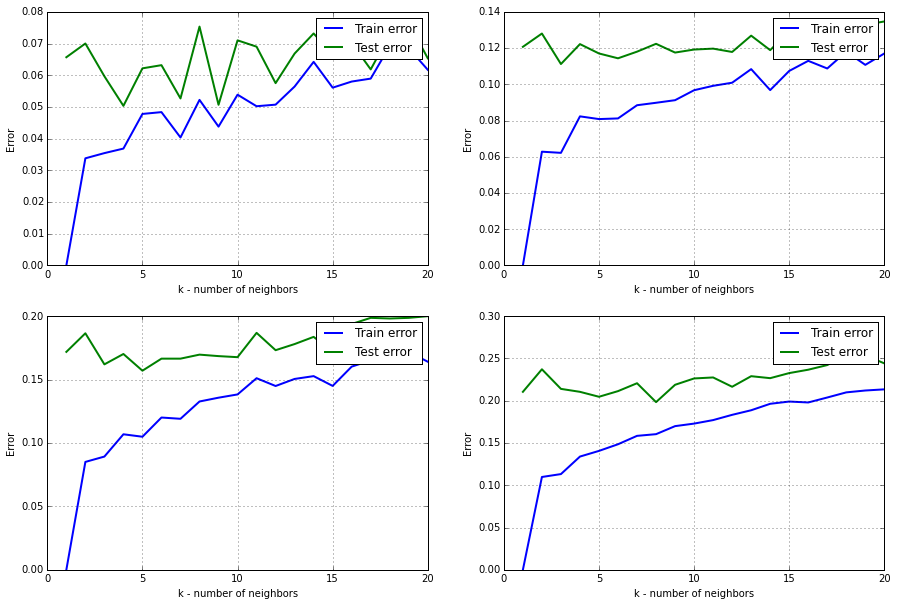

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10   # 10 inches in width, 5 in height

N_instance = 200
graph_count = 1
k_range = range(1,21)
K_LIST = [2, 3, 4, 5]
for _K in K_LIST:
    optim_k, trainError, testError = knn_eval(N_instance, features=3, classes=_K, informative=3, test_ratio=0.3, k_range=range(1, 21), n_trials=100)
    subplot(2,2,graph_count)
    plt.plot(k_range, trainError, label="Train error" , linewidth=2)
    plt.plot(k_range, testError, label="Test error", linewidth=2)   
    plt.xlabel('k - number of neighbors')
    plt.ylabel('Error')
    plt.legend(loc ='upper right')
    plt.grid(True)
    graph_count += 1
    print "Optimalni k: {} za broj primjera: {}  i broj klasa : {}".format(optim_k, N_instance, _K)


**Q:** Jesu li rezultati očekivani? Obrazložite.

### (g)

U prethodnim zadatcima analizirali smo oblik krivulja pogreška u ovisnosti o $k$, za nekoliko odabranih vrijednosti parametara $N$, $n$ odnosno $K$. Tako dobiveni uvidi su korisni, međutim, u praksi ćemo vrijednost za $k$ optimirati na skupu za provjeru, pa nas zapravo zanima kako se pogreške ponašaju uz optimalnu vrijednost za $k$. 

Koristeću funkciju `knn_eval` iz (b) dijela zadatka, generirajte grafikone koji prikazuju pogreške učenja i ispitivanja za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja), i to (1) u ovisnosti o broju primjera ($N\in\{100, 200,\dots, 1000\}$), (2) broju značajki ($n\in\{2,\dots,10\})$ i (3) broju klasa ($K\in\{2,\dots,10\})$. Posljednja dva grafikona generirajte s $N=1000$ primjera. Ukupno trebate generirati tri grafikona, svaki s dvije krivulje (pogreška učenja i pogreška ispitivanja).

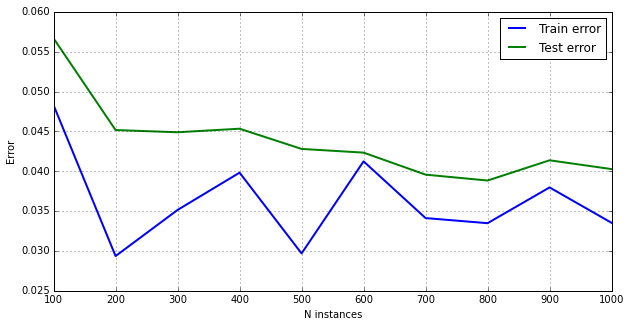

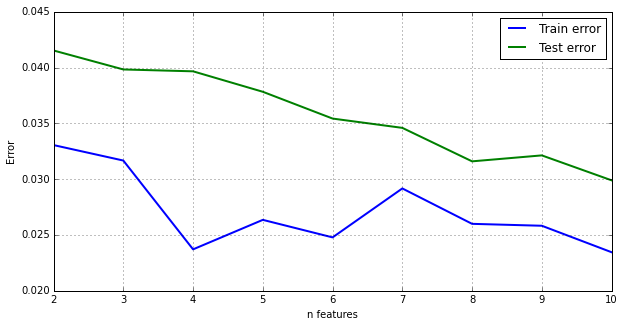

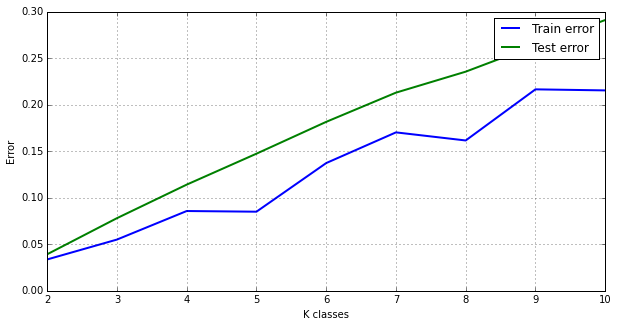

In [38]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5   # 10 inches in width, 5 in height

N_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
n_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
K_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]

_train_errors = []
_test_errors = []

for _N in N_list:
    optimal_k, trainError, testError = knn_eval(_N, features=2, classes=2, informative=2, test_ratio=0.3, k_range=range(1, 21), n_trials=100)
    _train_errors.append(trainError[optimal_k-1])
    _test_errors.append(testError[optimal_k-1])

plt.plot(N_list, _train_errors, label="Train error" , linewidth=2)
plt.plot(N_list, _test_errors, label="Test error", linewidth=2)   
plt.xlabel('N instances')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.show()

_train_errors = []
_test_errors = []


for _n in n_list:
    optimal_k, trainError, testError = knn_eval(1000, features=_n, informative=_n)
    _train_errors.append(trainError[optimal_k-1])
    _test_errors.append(testError[optimal_k-1])

plt.plot(n_list, _train_errors, label="Train error" , linewidth=2)
plt.plot(n_list, _test_errors, label="Test error", linewidth=2)   
plt.xlabel('n features')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.show()

_train_errors = []
_test_errors = []


for _K in K_list:
    optimal_k, trainError, testError = knn_eval(1000, features=4, classes=_K, informative=4)
    _train_errors.append(trainError[optimal_k-1])
    _test_errors.append(testError[optimal_k-1])

plt.plot(K_list, _train_errors, label="Train error" , linewidth=2)
plt.plot(K_list, _test_errors, label="Test error", linewidth=2)   
plt.xlabel('K classes')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.show()

**Q:** Jesu li rezultati očekivani? Obrazložite.

### 3. Nerobusnost algoritma k-nn

Svrha ovog zadatka jest analizirati u kojoj je mjeri algoritam k-nn osjetljiv na razlike u mjernoj skali između pojedinih dimenzija te na prisutnost nebitnih značajki.

### (a)

Pomoću funkcije `make_classification` generirajte skup od $N=200$ primera sa $n=2$ značajke i $K=2$ klase. Postavite `n_reduntant=0` i `n_clusters_per_class=2`. Zatim napravite kopiju tog skupa podataka i preinačite ju tako da jednu dimenziju pomnožite sa 100. Oba skupa podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3, pri čemu obratite pozornost da oba skupa podijelite na identičan način, tako da se skupovi za učenje i ispitivanje oni u konačnici razlikuju jedino u tome što jedan ima jednu dimenziju skaliranu. Trenirajte modele k-nn na skaliranoj i neskaliranoj varijanti skupa za učenje, a zatim ispitajte model na odgovarajućim ispitnim varijantama skupova.

In [182]:
X1, y1 = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)

X2 = np.copy(X1)
y2 = np.copy(y1)
X2[:,1] = X2[:,1]*100

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X1_train, y1_train)
print knn_clf.score(X1_test, y1_test)

knn_clf.fit(X2_train, y2_train)
print knn_clf.score(X2_test, y2_test)

# skaliranje znacajke jako ujtece na error

0.8
0.55


**Q:** Jesu li rezultati očekivani? Obrazložite.

### (b)

Kako bismo provjerili u kojoj je mjeri algoritam k-nn osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju `make_classification` kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval` iz zadatka (2b), jer ćemo na taj način dobiti pouzdanije procjene.

Generirajte dva skupa primjera, oba sa $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

In [183]:
opti_k, trainErr, testErr = knn_eval(1000, features=10, informative=10, classes=5)
print "Train error 10/10 features informative: ", trainErr[opti_k-1]
print "Test error 10/10 features informative: ", testErr[opti_k-1]

opti_k, trainErr, testErr = knn_eval(1000, features=10, informative=5, classes=5)
print "Train error 5/10 features informative: ", trainErr[opti_k-1]
print "Test error 5/10 features informative: ", testErr[opti_k-1]

# Manje informativne znacajke generiraju veci error 

Train error 10/10 features informative:  0.0782571428571
Test error 10/10 features informative:  0.126266666667
Train error 5/10 features informative:  0.168671428571
Test error 5/10 features informative:  0.202166666667


### (c)

U prethodnom zadatku ograničili smo se na slučaj kada je samo pola značajki bitnih. Načinite grafikon optimalne ispitne pogreške (za optimalan $k$) kao funkcije broja bitnih značajki u intervalu $\{5,\dots,20\}$. Ukupan broj značajki neka je uvijek $n=20$. Radi  usporedbe, ponovite isti izračun za model logističke regresije iz [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Na istome grafikonu prikažite krivulje ispitne pogreške za oba modela.

In [185]:
from sklearn.linear_model import LogisticRegression

def logisitic_eval(instances, features=2, classes=2, informative=2, test_ratio=0.3, k_range=range(1, 21), n_trials=100):
    average_train_errors = []
    average_test_errors = []
    n_redundant = 0

    for i in range(n_trials):
        # generate data with make_classification method and split them with train_test_split into train/test data
        X_data, Y_data = make_classification(instances, n_features=features, n_informative=informative, n_redundant=0, n_classes=classes, n_clusters_per_class=1)
        X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=test_ratio, random_state=42)

        # training knn model with generated data
        lr_model = LogisticRegression()
        lr_model.fit(X_train, y_train)

        predict_train = lr_model.predict(X_train)
        predict_test = lr_model.predict(X_test)

        empirijska_pogreska = 1-lr_model.score(y_train, predict_train)
        pogreska_generalizacije = 1-lr_model.score(y_test, predict_test)

        # error calculation for train and test prediction
        error_train.append(empirijska_pogreska)
        error_test.append(pogreska_generalizacije)

    average_train_errors.append(sum(error_train) / n_trials)
    average_test_errors.append(sum(error_test) / n_trials)    

    return average_train_errors, average_test_errors
        

informative_list = range(5,21)
n_features = 20

testErrKnn = []
testErrLogisiticReg = []

for inf in informative_list:
    bestK, trainErr, testErr = knn_eval(1000, features=20, informative=inf, classes=5)
    testErrKnn.append(testErr[bestK-1])
    

for inf in informative_list:
    trainErr, testErr = logisitic_eval(1000, features=20, informative=inf, classes=5)
    testErrLogisiticReg.append(testErr)

    
plt.plot(informative_list, testErrKnn, label="Test error KNN", linewidth=2)
plt.plot(informative_list, testErrLogisiticReg, label="Test error LR", linewidth=2)
plt.xlabel('Informative_list')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.show()

# KNN ovisi o informativnim znacajkama dok LR ne ovisi i relativno je konstantan

ValueError: X has 700 features per sample; expecting 20

**Q:** Koji je model manje robusan na prisustvo nebitnih značajki? Što mislite, zašto je tomu tako?

### 5. Primjena algoritma k-nn na skupu "101 Questions"

U ovom zadatku algoritam k-nn primijenit ćemo na skup podataka "101 Questions". Skup sadrži odgovore 99 studenata na 101 dihotomno pitanje kojima iskazuju svoju preferenciju prema jednoj od dviju stvari (npr. "more" vs "planina"). Skup podataka preuzmite odavde:

In [174]:
q101 = pd.read_csv("https://github.com/jsnajder/StrojnoUcenje/raw/master/data/questions101-2015.csv", comment='#')

### (a)

Prvi stupac (oznaka "Ime/pseudonim:") jest ime odnosno pseudonim anketiranog studenta/ice, dok su ostali stupci odgovori na pitanja. Taj je stupac potrebno ukloniti iz podataka (zašto?). Nadalje, na dva od 101 pitanja svih 99 anketiranih studenata dalo je identičan odgovor. Pronađite koja su to dva pitanja ([pomoć](http://stackoverflow.com/questions/30503321/finding-count-of-distinct-elements-in-dataframe-in-each-column)) te ih uklonite (uklonite odgovarajuće retke). U načelu ne bi bio problem da te značajke zadržimo, međutim, zbog načina na koji ćemo napraviti predobradu podataka, opisan u nastavku, bitno je ipak da ih uklonimo.

Odgovori na pitanja kategoričke su slučajne varijable. Premda bismo načelno mogli primijeniti algoritam k-nn na kategoričke značajke, implementacija u sklearnu to ne dopušta, pa je kategoričke značajke potrebno pretvoriti u numeričke. Pretvorba kategoričkih u numeričke značajke tipično se provodi tzv. *one-hot* kodiranjem. Upoznajte se s tim kodiranjem i zašto je ono potrebno: [one-hot encoding](http://stackoverflow.com/questions/17469835/one-hot-encoding-for-machine-learning).

Provedite one-hot kodiranje podataka (nakon izbacivanja dvaju suvišnih stupaca). To možete najlakše učiniti izravno nad pandas-okvirom, funkcijom [`get_dummies`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

**Q:** Objasnite zašto kategoričke značajke kodiramo one-hot postupkom, a ne nekim drugim (npr. zašto ih jednostavno ne indeksiramo po vrijednostima)?

**Q:** Koja je dimenzija podataka q101 nakon *one-hot* kodiranja? Zašto?

In [175]:
import pandas as pd
from pandas import Series

#print q101
q101.drop(['Ime/pseudonim:'], axis=1, inplace=True)
#print q101.shape
counts = q101.T.apply(lambda x: x.nunique(), axis=1)

idx = np.where(counts == 1)
q101 = q101.drop(q101.columns[idx[0]], axis=1)

print q101.shape
print q101
#print q101

(99, 99)
         Q1      Q2    Q3     Q4      Q5          Q6       Q7       Q8  \
0      More  Zagreb  Voda  Mačke     USA  Televizija    Messi   Oliver   
1      More  Zagreb   Sok    Psi  Europa  Televizija    Messi   Oliver   
2      More  Zagreb   Sok    Psi  Europa  Televizija  Ronaldo   Oliver   
3      More  Zagreb  Voda  Mačke  Europa       Radio  Ronaldo   Oliver   
4      More   Split  Voda    Psi  Europa  Televizija    Messi  Gibonni   
5      More   Split   Sok    Psi     USA  Televizija    Messi   Oliver   
6      More  Zagreb  Voda    Psi  Europa  Televizija    Messi   Oliver   
7   Planina  Zagreb  Voda  Mačke  Europa       Radio    Messi  Gibonni   
8      More  Zagreb   Sok  Mačke  Europa  Televizija    Messi   Oliver   
9      More  Zagreb  Voda    Psi  Europa  Televizija    Messi   Oliver   
10  Planina  Zagreb  Voda    Psi  Europa       Radio  Ronaldo   Oliver   
11     More  Zagreb  Voda    Psi  Europa  Televizija    Messi   Oliver   
12     More  Zagreb  Voda    

### (b)

Proučite funkciju [sklearn.neighbors.NearestNeighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors). Pomoću te funkcije, ispišite za svakog od 99 anketiranih studenata/ica njihovih pet najbližih susjeda po euklidskoj mjeri udaljenosti. Ispišite imena odnosno pseudonim svakog studenta/ice te također imena odnosno pseudonim njihovih pet najbližih susjeda.

In [176]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

#q101_data = pd.get_dummies(q101)
#print q101_data.shape

q101 = pd.read_csv("https://github.com/jsnajder/StrojnoUcenje/raw/master/data/questions101-2015.csv", comment='#')
knn_neighbors = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn_neighbors.fit(q101_data)
for i, row in q101_data.iterrows(): 
    distance, index = knn_neighbors.kneighbors(row)
    print q101.at[i, 'Ime/pseudonim:'], ": ", 
    for ind in index[0]:
        print q101.at[ind, 'Ime/pseudonim:'], ", ",
    print



(99, 198)
Zdravko Mamic :  Zdravko Mamic ,  kale ,  ja ,  Chiraox ,  Marluk , 
Josip :  Josip ,  Ante ,  maslačak ,  musketir ,  Gljiva , 
Ivan Dundović :  Ivan Dundović ,  Filip ,  Kec ,  polo ,  Antiša , 
Vinkovic Tomo :  Vinkovic Tomo ,  Zdravko Mamic ,  Mateo ,  Ojo ,  Dario , 
Muškarac24 :  Muškarac24 ,  Mimi ,  Jakov Ivančan ,  Filip ,  luka , 
Ante :  Ante ,  Filip ,  Tin ,  Bojanovski ,  polo , 
Mateo :  Mateo ,  Chiraox ,  Ojo ,  Ante ,  Vinkovic Tomo , 
nordlys :  nordlys ,  Luka ,  Antiša ,  Krumpirko ,  Goga , 
Password123 :  Password123 ,  Zlatan ,  Gljiva ,  Kec ,  Jantol , 
Taylor Bagley :  Taylor Bagley ,  Vicky ,  Jan Tomljanović ,  Filip ,  vrana , 
Miško :  Miško ,  Pevec ,  staljinove-orgulje ,  nordlys ,  Antiša , 
Ante :  Ante ,  Josip ,  musketir ,  limp bizkit ,  Filip , 
dextroza :  dextroza ,  musketir ,  Spidey ,  Gljiva ,  zmajo , 
Backo :  Backo ,  765100 ,  limp bizkit ,  Ante ,  Josip , 
Chiraox :  Chiraox ,  Spidey ,  Zdravko Mamic ,  Mateo ,  Marluk , 


### (c)

Za kategoričke se značajke nerijetko kao mjera udaljenosti koristi [Hammingova udaljenost](https://en.wikipedia.org/wiki/Hamming_distance). Ponovite izračun susjeda za sve primjere iz skupa q101 pomoću Hammingove udaljenosti te usporedite rezultate s onima koje ste dobili s euklidskom udaljenošću.

In [178]:
print q101_data.shape

q101 = pd.read_csv("https://github.com/jsnajder/StrojnoUcenje/raw/master/data/questions101-2015.csv", comment='#')
knn_neighbors = NearestNeighbors(n_neighbors=5, metric='hamming')
knn_neighbors.fit(q101_data)
for i, row in q101_data.iterrows(): 
    distance, index = knn_neighbors.kneighbors(row)
    print q101.at[i, 'Ime/pseudonim:'], ": ", 
    for ind in index[0]:
        print q101.at[ind, 'Ime/pseudonim:'], ", ",
    print


(99, 198)
Zdravko Mamic :  Zdravko Mamic ,  kale ,  ja ,  Chiraox ,  Marluk , 
Josip :  Josip ,  Ante ,  maslačak ,  musketir ,  Gljiva , 
Ivan Dundović :  Ivan Dundović ,  Filip ,  Kec ,  polo ,  Antiša , 
Vinkovic Tomo :  Vinkovic Tomo ,  Zdravko Mamic ,  Mateo ,  Ojo ,  Dario , 
Muškarac24 :  Muškarac24 ,  Mimi ,  Jakov Ivančan ,  Filip ,  luka , 
Ante :  Ante ,  Filip ,  Tin ,  Bojanovski ,  polo , 
Mateo :  Mateo ,  Chiraox ,  Ojo ,  Ante ,  Vinkovic Tomo , 
nordlys :  nordlys ,  Luka ,  Antiša ,  Krumpirko ,  Goga , 
Password123 :  Password123 ,  Zlatan ,  Gljiva ,  Kec ,  Jantol , 
Taylor Bagley :  Taylor Bagley ,  Vicky ,  Jan Tomljanović ,  Filip ,  vrana , 
Miško :  Miško ,  Pevec ,  staljinove-orgulje ,  nordlys ,  Antiša , 
Ante :  Ante ,  Josip ,  musketir ,  limp bizkit ,  Filip , 
dextroza :  dextroza ,  musketir ,  Spidey ,  Gljiva ,  zmajo , 
Backo :  Backo ,  765100 ,  limp bizkit ,  Ante ,  Josip , 
Chiraox :  Chiraox ,  Spidey ,  Zdravko Mamic ,  Mateo ,  Marluk , 


**Q:** Razlikuju li se rezultati? Razlikuje li se euklidska udaljenost od Hammingove za pojedinačne parove primjera iz skupa q101 (provjerite)? Obrazložite.

### (d)

Želimo predvidjeti odgovore na neka pitanja na temelju poznatih odgovora na neka druga pitanja. Predikciju ćemo ostvariti algoritmom k-nn, što zapravo znači da će se predviđanje odvijati tako da će se za poznate odgovore na pitanja najprije pronaći studenti koji su na sličan način odgovorili na ta pitanja (susjedi), a onda će se predikcija izračunati kao njihov većinski odgovor. Odgovore na prvih 49 pitanja koristit ćemo kao poznate odgovore, te pomoću njih pokušati predvidjeti odgovore na ostala 49 pitanja.

Skup q101, binariziran na način kako je opisano u dijelu (a), podijelite po stupcima u dva dijela: prvi dio (50 odgovora) koristit ćemo kao značajke (poznati odgovori), a drugi dio (49 odgovora) čine odgovori koje ćemo pokušati predvidjeti (nepoznati odgovori). Oba ova skupa podijelite na skupove za učenje i ispitivanje u omjeru 7:3.

Za svaki od 49 nepoznatih odgovora, trenirajte po jedan k-nn klasifikator na 50 poznatih odogovora. Klasifikatore naravno trenirajte na skupu za učenje i ispitajte na skupu za ispitivanje. Paralelno s time, za svaki od 49 nepoznatih odgovora trenirajte i po jedan referentni klasifikator, koji će sve primjere jednostavno klasificirati u najčešću klasu za dotično pitanje. U tu svrhu iskoristite model [`sklearn.dummy.DummyClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Sada za svaki od 49 nepoznatih odgovora ispišite točnost klasifikatora k-nn, točnost referentnog klasifikatora te razliku između njih. Dodatno, za svako pitanje ispišite i dva ponuđena odgovora, kako bismo mogli vidjeti za koja to pitanja klasifikator radi dobro.

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X_binary[:, 0:99], X_binary[:, 99:198], test_size=0.3)

# Vaš kôd ovdje...

**Q:** Za koja pitanja klasifikator radi bolje od referentnog modela?
    
**Q:** Zašto za dotična pitanja klasifikator radi dobro, a za druga ne?

**Q:** Kada biste željeli optimirati hiperparametar $k$, kako biste to napravili?

### 6. Stabla odluke

U ovom zadatku usredotočit ćemo se na primjenu stabala odluke za problem klasifikacije. Upoznajte se s klasom [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Ako nije rečeno drugačije, koristite pretpostavljene parametre modela. 

Radit ćemo sa skupom podataka *Titanic*. S obzirom na to da taj skup podataka za neke primjere nema vrijednosti svih atributa, a i da su neki atributi nebrojčani, prvo ga trebamo obraditi.

### (a)

Prvo učitajte skup podataka _Titanic_ i izdvojite samo sljedeće atribute: _Pclass, Sex, Age, SibSp, Parch,_ i _Embarked_. To su značajke s kojima ćemo raditi. Ciljnu klasu predstavlja atribut _Survived_.

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/jsnajder/StrojnoUcenje/master/data/titanic-train.csv')

titanic_X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].as_matrix()
titanic_Y = df['Survived'].as_matrix()

print titanic_X[5,:]

# Nije pametno uključiti passengerID, Ticket i Fare i Cabin su potpuno različiti i neće biti od pomoći 

[3 'male' nan 0 0 'Q']


**Q:** Pogledajte ostale značajke u skupu podataka. Smatrate li da bi bilo dobro uključiti još koju? Zašto?

### (b)

Koristeći razred [`LabelEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) pretvorite nebrojčane atribute _Sex_ i _Embarked_ u numeričke (ovakav pristup moguć je kod stabala odluke, ali inače se koristi [`OneHotEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)).

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic_X[:,1] = le.fit_transform(titanic_X[:,1])
titanic_X[:,5] = le.fit_transform(titanic_X[:,5])

print titanic_X[5,:]

[3 1 nan 0 0 2]


/Users/filipzelic/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


**Q:** Mogli smo koristiti i spomenuti _hot-one encoding_. Zašto to kod stabala odluke često ipak nije najbolja ideja?

### (c) 

U skupu podataka _Titanic_ za neke primjeri nisu poznate vrijednosti svih atributa. Proučite razred [`Imputer`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) i pomoću njega riješite ovaj problem tako da nedostajuće vrijednosti zamijenite najčešćom vrijednošću dotičnog atributa kroz primjere.

In [27]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
titanic_X = imp.fit_transform(titanic_X)

print titanic_X[5,:]

[  3.   1.  24.   0.   0.   2.]


### (d)

Na tako pripremljenome skupu _Titanic_ trenirajte stablo odluke (klasa `DecisionTreeClassifier`). Izgradite dva stabla koristeći dva različita kriterija oabira korijenskog čvora (parametar `criterion`): `entropy` (informacijska dobit) i `gini` (Ginijev indeks). Ispitajte modele na cijelom skupu (istom na kojem ste ih i trenirali) te ispišite točnost modela. Nadalje, član `feature_importances_` sadrži polje kriterijskih vrijednosti za svaki atribut. Ispišite te vrijednosti za oba modela.

In [236]:
from sklearn.tree import DecisionTreeClassifier

tree_gini = DecisionTreeClassifier(criterion='gini')
tree_gini.fit(titanic_X, titanic_Y)
predicted_gini = tree_gini.predict(titanic_X)
score_gini = accuracy_score(titanic_Y, predicted_gini)
print "Accuracy score Gini criterion: ", score_gini
print tree_gini.feature_importances_
print 
tree_entropy = DecisionTreeClassifier(criterion='entropy') 
tree_entropy.fit(titanic_X, titanic_Y)
predicted_entropy = tree_entropy.predict(titanic_X)
score_entropy = accuracy_score(titanic_Y, predicted_entropy)
print "Accuracy score Entropy criterion: ", score_entropy
print tree_entropy.feature_importances_

# Oba su ista jer postoje kontradiktorne tvrdnje i ne moze doci do 100 % accuracy, nije zadan max depth pa algoritam
# idem duboko dok ne dobi najbolji accuracy 
# Kada zadamo neki max depth rezultati su malo drugačiji zato jer drugačije računaju informacijsku dobit

Accuracy score Gini criterion:  0.937149270483
[ 0.13669578  0.36099182  0.30163306  0.09433929  0.05835278  0.04798728]

Accuracy score Entropy criterion:  0.937149270483
[ 0.14737282  0.2838779   0.3511844   0.09724418  0.06324579  0.0570749 ]


**Q:** Usporedite rezultate modela s kriterijem `entropy` i `gini`. Postoji li razlika? Zašto?

**Q:** Zašto pogreška učenja nije jednaka nuli? Bi li to trebala biti?

**Q:** Koja značajka je korijenska značajka prema kriteriju `entropy`, a koja prema kriteriju `gini`?

### 7. Regularizacija stabala odluke

Pri izgradnji stabla odluke vrlo lako može doći do prenaučenosti s obzirom na to da stablo raste dok se svi primjeri za učenje ispravno ne klasificiraju. Jedan od načina sprječavanja prenaučenosti jest zaustavljanje rasta stabla na određenoj dubini. Spomenuto ograničenje regulira se pomoću parametra `max_depth` konstruktora razreda `DecisionTreeClassifier`.

Podijelite skup podataka _Titanic_ na skup za učenje i na skup za ispitivanje u omjeru 2:3 korištenjem funkcije [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html).

Iscrtajte krivulje pogrešaka na skupu za učenje i na skupu za ispitivanje za svaki parametar maksimalne dubine $d$, pri čemu je $d \in \{1,2,\ldots,30\}$. Koristite Ginijev indeks.

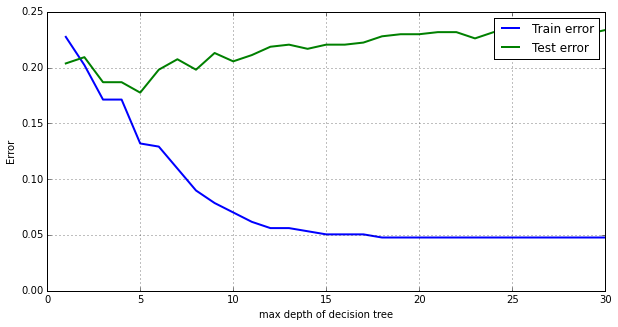

In [31]:
from sklearn.cross_validation import train_test_split

titanic_train_X, titanic_test_X, titanic_train_Y, titanic_test_Y = train_test_split(titanic_X, titanic_Y, test_size=0.6, random_state=42)
depth_list = range(1,31)

error_train_titanic = []
error_test_titanic = []

for depth in depth_list:
    tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    tree_clf.fit(titanic_train_X, titanic_train_Y)
    
    predicted_train_titanic = tree_clf.predict(titanic_train_X)
    predicted_test_titanic = tree_clf.predict(titanic_test_X)
    
    empiric_err = 1-accuracy_score(titanic_train_Y, predicted_train_titanic)
    generalization_err = 1-accuracy_score(titanic_test_Y, predicted_test_titanic)
    
    error_train_titanic.append(empiric_err)
    error_test_titanic.append(generalization_err)

plt.plot(depth_list, error_train_titanic, label="Train error" , linewidth=2)
plt.plot(depth_list, error_test_titanic, label="Test error", linewidth=2)   
plt.xlabel('max depth of decision tree')
plt.ylabel('Error')
plt.legend(loc ='upper right')
plt.grid(True)
plt.show() 

# Lijeva strana je underfitting jer je podnaučen prenisko je stablo 
# Desna strana je overfitting jer je stablo preduboko i pokusava sve primjere dobro klasificirati

**Q:** Na koju biste dubinu ograničili rast stabla i zašto?
    
**Q:** Kojoj strani u grafikonu odgovara područje prenaučenosti, a kojoj područje podnaučenosti?

### 8. Matrice zabune i evaluacijske mjere

Kako bismo se uvjerili koliko naš naučeni model zapravo dobro radi, nužno je provesti evaluaciju modela. Ovaj korak od presudne je važnosti u svim primjenama strojnog učenja, pa je stoga bitno znati provesti evaluaciju na ispravan način. Cilj ovog zadatka jest upoznati se s osnovnim evaluacijskim mjerama temeljenima na matrici zabune (engl. *confusion matrix*).

Preuzmite Glass Identification Data Set, koji opisuje rezultate kemijske analize 214 stakala. Riječ je o klasifikacijskom problemu sa šest klasa: na temelju 9 kemijskih značajki stakla potrebno je, u svrhu forenzičke analize, odrediti o kojoj se od šest vrsta stakla radi. Skup podataka možete učitati na sljedeći način:

In [189]:
data = sp.loadtxt("/Users/filipzelic/Documents/7.Semestar/Su/Ipython biljeznice LABOSI/glass.csv", delimiter=',')
glass_X, glass_y = data[:,1:10], data[:,10]

print glass_X
print glass_X.shape
print glass_y
print glass_y.shape

[[  1.52101  13.64      4.49    ...,   8.75      0.        0.     ]
 [  1.51761  13.89      3.6     ...,   7.83      0.        0.     ]
 [  1.51618  13.53      3.55    ...,   7.78      0.        0.     ]
 ..., 
 [  1.52065  14.36      0.      ...,   8.44      1.64      0.     ]
 [  1.51651  14.38      0.      ...,   8.48      1.57      0.     ]
 [  1.51711  14.23      0.      ...,   8.62      1.67      0.     ]]
(214, 9)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.

Ovaj skup podataka ne sadrži nenumeričke atribute niti nedostajuće vrijednosti, stoga ne treba raditi nikakvu obradu. Podijelite skup primjera na skup za učenje i na skup za ispitivanju u omjeru 2:3 (koristite funkciju `train_test_split`). Izgradite stablo odluke na temelju dobivenog skupa za učenje.

In [190]:
from sklearn.cross_validation import train_test_split

glass_train_X, glass_test_X, glass_train_y, glass_test_y = train_test_split(glass_X, glass_y, test_size=0.6, random_state=42)

# print glass_train_X.shape
# print glass_test_X.shape

# Decision tree classifier
glass_clf = DecisionTreeClassifier(criterion='gini')
glass_clf.fit(glass_train_X, glass_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

### (a)

Definirajte funkciju `create_confusion_matrix(y_true, y_pred)` koja generira matricu zabune dimenzija $K\times K$, gdje je $K$ broj klasa. Funkcija prima stvarne oznake primjera (`y_true`) i oznake predikcije modela (`y_pred`) te vraća (1) matricu zabune i (2) polje oznaka klasa (gdje su klase poredane onako kako su poredane u matrici zabune). Retci matrice neka odgovaraju stvarnim oznakama (true), a stupci predikcijama modela (pred).

In [191]:
from sklearn.metrics import confusion_matrix

# true -> glass_test_y
glass_test_predicted = glass_clf.predict(glass_test_X)

def create_confusion_matrix(y_true, y_pred):
    # get max number of classes
    K = int(max(y_true))
    # create classes 1 to max
    labels = range(1,(K+1))
    
    actual = np.array(y_true)
    predicted = np.array(y_pred)

    confusion_mat = np.zeros((K, K))
    for a, p in zip(actual, predicted):
        # classes are indexed from 1 and matrix from 0 so [a-1][p-1]
        confusion_mat[a-1][p-1] += 1

    return confusion_mat, labels


conf_mat, classes = create_confusion_matrix(glass_test_y, glass_test_predicted)
print "Implementation of confusion matrix: "
print  conf_mat
print
print "Classes in dataset: ", classes
print 


sklearn_matrix = confusion_matrix(glass_test_y, glass_test_predicted, labels=None)
print "Sklearn method for confusion matrix: "
print sklearn_matrix

# Najbrojnija klasa je 2. jer zbroj 2. retka je najveci (48)
# Najvise false pozitiva ima 1.klasa jer u ovakvoj consfusion matrici false positivi su stupci bez dijagonala za prvu 
# ispada 16 FP

Implementation of confusion matrix: 
[[ 33.   6.   2.   0.   0.   0.   1.]
 [ 12.  27.   4.   0.   1.   1.   3.]
 [  3.   3.   5.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   0.   0.   7.   0.   0.]
 [  0.   0.   0.   0.   0.   2.   4.]
 [  0.   1.   0.   0.   0.   2.  11.]]

Classes in dataset:  [1, 2, 3, 4, 5, 6, 7]

Sklearn method for confusion matrix: 
[[33  6  2  0  0  1]
 [12 27  4  1  1  3]
 [ 3  3  5  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0  2  4]
 [ 0  1  0  0  2 11]]


/Users/filipzelic/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Izračunajte i ispišite matricu zabune za stablo odluke na ispitnome dijelu skupa `glass`. Uvjerite se da vaša implementacija radi jednako kao funkcija [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

**Q:** Koja je klasa najbrojnija?
    
**Q:** Koja klasa ima najviše pogrešnih pozitivnih klasifikacija (false positives), a koja najviše pogrešnih negativnih klasifikacija (false negatives)?

### (b)

Definirajte funkciju `twoway_confusion_matrix(cm, i)` koja prima matricu zabune `cm` dimenzija $K\times K$ i indeks klase $i$ te izračunava binarnu matricu zabune za klasu $i$ kao pozitivnu klasu.

In [192]:
def twoway_confusion_matrix(cm, i):
    K = len(cm[0])
    cm_2 = np.zeros((2,2))
    cm_2[0][0] = cm[i][i] # true positiv
     
    false_positives = [cm[x][i] for x in range(0,K) if x != i] # false positive is column without index i
    cm_2[1][0] = sum(false_positives)

    false_negatives = [cm[i][x] for x in range(0,K) if x != i] # false negatives is row without index i
    cm_2[0][1] = sum(false_negatives)
    # rest of examples
    cm_2[1][1] = sum(cm) - cm_2[0][0] - cm_2[0][1] - cm_2[1][0]
    
    tp = cm_2[0][0]
    fp = cm_2[1][0]
    fn = cm_2[0][1]
    tn = cm_2[1][1]
    return cm_2, tp, fp, fn, tn

print "Klasa 1:"
print twoway_confusion_matrix(conf_mat, 0)
print "Klasa 2:"
print twoway_confusion_matrix(conf_mat, 1)
print "Klasa 3:"
print twoway_confusion_matrix(conf_mat, 2)
print "Klasa 4:"
print twoway_confusion_matrix(conf_mat, 3)
print "Klasa 5:"
print twoway_confusion_matrix(conf_mat, 4)
print "Klasa 6:"
print twoway_confusion_matrix(conf_mat, 5)
print "Klasa 7:"
print twoway_confusion_matrix(conf_mat, 6)

Klasa 1:
(array([[ 33.,   9.],
       [ 15.,  72.]]), 33.0, 15.0, 9.0, 72.0)
Klasa 2:
(array([[ 27.,  21.],
       [ 11.,  70.]]), 27.0, 11.0, 21.0, 70.0)
Klasa 3:
(array([[   5.,    6.],
       [   6.,  112.]]), 5.0, 6.0, 6.0, 112.0)
Klasa 4:
(array([[   0.,    0.],
       [   0.,  129.]]), 0.0, 0.0, 0.0, 129.0)
Klasa 5:
(array([[   7.,    1.],
       [   1.,  120.]]), 7.0, 1.0, 1.0, 120.0)
Klasa 6:
(array([[   2.,    4.],
       [   3.,  120.]]), 2.0, 3.0, 4.0, 120.0)
Klasa 7:
(array([[  11.,    3.],
       [   8.,  107.]]), 11.0, 8.0, 3.0, 107.0)


Izračunajte i ispišite binarne matrice zabune za svih 6 klasa iz skupa `glass`.

### (c)

Pomoću funkcija iz (a) i (b) dijela zadatka, definirajte funkcije `accuracy`, `precision`, `recall` i `f1` za izračun točnosti, preciznosti, odziva odnosno F1-mjere. Svaka od ovih funkcija uzima kao argumente stvarne oznake primjera `y_true` i predviđene oznake `y_pred`. Funkcije trebaju izračunavati mikro i makro varijante ovih mjera, što se određuje opcijom `averaging=micro` odnosno `averaging=macro` (podrazumijevana vrijednost).

Izračunajte vrijednosti ovih evaluacijskih mjera na skupu `glass`. Uvjerite da vaša implementacija daje identične rezultate kao funkcije iz paketa [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). Ove funkcije pretpostavljaju makro-mjere, osim one za F1 koja može primiti i parametar koji definira hoće li se izračunati mikro ili makro vrijednost.

In [232]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from __future__ import division

def my_accuracy(y_true, y_pred, averaging='macro'):
    average_acc = []
    cm, classes= create_confusion_matrix(y_true, y_pred)
    if(averaging=='macro'): 
        for c in classes:
            cm_2, tp, fp, fn, tn = twoway_confusion_matrix(cm, c-1)
            acc = (tp + tn) / sum(cm_2)
            average_acc.append(acc)
        return sum(average_acc) / (len(classes)-1)
    
    elif(averaging=='micro'):
        _tp = []
        _fp = []
        _fn = []
        _tn = []
        for c in classes:
            cm_2, tp, fp, fn, tn = twoway_confusion_matrix(cm, c-1)
            _tp.append(tp)
            _fp.append(fp)
            _fn.append(fn)
            _tn.append(tn)
        return ((nansum(_tp)+nansum(_tn)) / sum(cm_2))

def my_recall(y_true, y_pred, averaging='macro'):
    average_recall = []
    cm, classes= create_confusion_matrix(y_true, y_pred)
    if(averaging=='macro'): 
        for c in classes:
            cm_2, tp, fp, fn, tn = twoway_confusion_matrix(cm, c-1)
            rec = (tp) / (tp + fn)
            average_recall.append(rec)
        return nansum(average_recall) / (len(classes)-1)
    
    elif(averaging=='micro'):
        _tp = []
        _fp = []
        _fn = []
        _tn = []
        for c in classes:
            cm_2, tp, fp, fn, tn = twoway_confusion_matrix(cm, c-1)
            _tp.append(tp)
            _fp.append(fp)
            _fn.append(fn)
            _tn.append(tn)
        return (nansum(_tp) / (nansum(_tp)+nansum(_fn)))

def my_precision(y_true, y_pred, averaging='macro'):
    average_precision = []
    cm, classes= create_confusion_matrix(y_true, y_pred)
    if(averaging=='macro'): 
        for c in classes:
            cm_2, tp, fp, fn, tn = twoway_confusion_matrix(cm, c-1)
            prec = (tp) / (tp + fp)
            average_precision.append(prec)
        return nansum(average_precision) / (len(classes)-1)
    
    elif(averaging=='micro'):
        _tp = []
        _fp = []
        _fn = []
        _tn = []
        for c in classes:
            cm_2, tp, fp, fn, tn = twoway_confusion_matrix(cm, c-1)
            _tp.append(tp)
            _fp.append(fp)
            _fn.append(fn)
            _tn.append(tn)
        return (nansum(_tp) / (nansum(_tp)+nansum(_fp)))
    
def my_f1_score(y_true, y_pred, averaging='macro'):
    average_f1 = []
    cm, classes= create_confusion_matrix(y_true, y_pred)
    if(averaging=='macro'): 
        for c in classes:
            cm_2, tp, fp, fn, tn = twoway_confusion_matrix(cm, c-1)
            R = (tp) / (tp + fn)
            P = (tp) / (tp + fp)
            F1 = (2*P*R) / (P+R)
            average_f1.append(F1)
        return nansum(average_f1) / (len(classes)-1)
    
    elif(averaging=='micro'):
        _tp = []
        _fp = []
        _fn = []
        _tn = []
        for c in classes:
            cm_2, tp, fp, fn, tn = twoway_confusion_matrix(cm, c-1)
            _tp.append(tp)
            _fp.append(fp)
            _fn.append(fn)
            _tn.append(tn)
            P = (nansum(_tp) / (nansum(_tp)+nansum(_fp)))
            R = (nansum(_tp) / (nansum(_tp)+nansum(_fn)))
        return (2*P*R) / (P+R)

print "Macro"
sklearn_accuracy = accuracy_score(glass_test_y, glass_test_predicted)
impl_accuracy = my_accuracy(glass_test_y, glass_test_predicted)
print "Sklearn accuracy score: {}, Implementation: {}".format(sklearn_accuracy, _accuracy)

sklearn_precision = precision_score(glass_test_y, glass_test_predicted, average='macro')
implt_precision = my_precision(glass_test_y, glass_test_predicted, averaging='macro')
print "Sklearn precision score: {}, Implementation: {}".format(sklearn_precision, implt_precision)

sklearn_recall = recall_score(glass_test_y, glass_test_predicted, average='macro')
impl_recall = my_recall(glass_test_y, glass_test_predicted, averaging='macro')
print "Sklearn recall score: {}, Implementation: {}".format(sklearn_recall, impl_recall)

sklearn_f1 = f1_score(glass_test_y, glass_test_predicted, average='macro')
impl_f1 = my_f1_score(glass_test_y, glass_test_predicted, averaging='macro')
print "Sklearn f1 score: {}, Implementation: {}".format(sklearn_f1, impl_f1)

print 
print "Micro"

sklearn_precision2 = precision_score(glass_test_y, glass_test_predicted, average='micro')
implt_precision2 = my_precision(glass_test_y, glass_test_predicted, averaging='micro')
print "Sklearn precision score: {}, Implementation: {}".format(sklearn_precision2, implt_precision2)

sklearn_recall2 = recall_score(glass_test_y, glass_test_predicted, average='micro')
impl_recall2 = my_recall(glass_test_y, glass_test_predicted, averaging='micro')
print "Sklearn recall score: {}, Implementation: {}".format(sklearn_recall2, impl_recall2)

sklearn_f1_2 = f1_score(glass_test_y, glass_test_predicted, average='micro')
impl_f1_2= my_f1_score(glass_test_y, glass_test_predicted, averaging='micro')
print "Sklearn f1 score: {}, Implementation: {}".format(sklearn_f1_2, impl_f1_2)


Macro
Sklearn accuracy score: 0.658914728682, Implementation: 0.902547065338
Sklearn precision score: 0.617753189793, Implementation: 0.617753189793
Sklearn recall score: 0.632801226551, Implementation: 0.632801226551
Sklearn f1 score: 0.620181465821, Implementation: 0.620181465821

Micro
Sklearn precision score: 0.658914728682, Implementation: 0.658914728682
Sklearn recall score: 0.658914728682, Implementation: 0.658914728682
Sklearn f1 score: 0.658914728682, Implementation: 0.658914728682


/Users/filipzelic/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


**Q:** Usporedite mikro-F1 i makro-F1. Koja je vrijednost veća? Je li to očekivano i zašto?

**Q:** Koji je odnos između mjera preciznosti, odziva i F1-mjere? Može li F1-mjera biti veća od preciznosti ili odziva? Obrazložite.

**Q:** Zašto su vrijednosti mikro-preciznosti, mikro-odziva i mikro-F1 identične? Hoće li to uvijek biti slučaj?

In [ ]:
# Ocekivano da je F1 makro manji jer on uzima srednju vrijdenost F1 scora za svaku klasu, pa one klase
# koje imaju manje primjera jace utjecu na pad F1 scora